In [20]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
players = ['Konevlad','Crecent','LongLive16Hayastan','may6enexttime','IWANNABEADOORED',
           'Ogrilla','dolar9','MilfSalvatore','cutemouse83','Benefactorr',
           'cjota95','alireza2003','vistagausta','GRUrussia','Drvitman',
           'NIndja64','KnezMihailova','Bestinblitz','AnonLondonKiller','black_knight22',
           'IVK88','Inventing_Invention','temp006','Arka50','Ernst_Gruenfeld',
           'Zaola420','GeorgMeier','SindarovGM','BenjaminBokTwitch','Hungry_Dragon',
           'avantage_ru','Chesstoday','GABUZYAN_CHESSMOOD','Tryhard00','TilChess',
           'muisback','MikeGScarn','Zhalmakhanov_R','L04d1ng','BabaRamdev',
           'opperwezen','Feokl1995','LucaBrazzi','Venost17','RebeccaHarris',
           'gmmoranda','YuQuesada','FakeBruceLee','swimmerchess','GrigorGrigorov']

elen = 8
cur_pos_cols = [f'c{i}' for i in range(elen)]
player_move_cols = [f'p{i}' for i in range(elen)]
optimal_move_cols = [f'o{i}' for i in range(elen)]
numeric_cols = cur_pos_cols + player_move_cols + optimal_move_cols
diff_cols = ['cur_pos'] + cur_pos_cols + ['player_move'] + player_move_cols + ['optimal_move'] + optimal_move_cols

In [3]:
def get_player_df(file_path, names):
    df = pd.read_csv(file_path, names=names, index_col=False)
    df['color'] = df['cur_pos'].apply(lambda x: x.split()[1])
    df = df.drop('cur_pos', axis=1)
#     df.loc[df['color'] == 'b',cols] = df*-1
#     df = df.drop('color', axis=1)
    df['player'] = os.path.basename(file_path).split('.')[0]
    return df

def get_all_df(players):
    ans = [get_player_df(f'diffs/{i}.csv', diff_cols) for i in players]
    return pd.concat(ans).reset_index(drop=True)

def get_diff_df(all_df, cols1, cols2):
    diff_df = all_df[cols1] - all_df[cols2].values
    diff_df['player'] = all_df['player']
    return diff_df

In [4]:
all_df = get_all_df(players).dropna()

player_change_df = get_diff_df(all_df, player_move_cols, cur_pos_cols)
optimal_change_df = get_diff_df(all_df, optimal_move_cols, cur_pos_cols)
player_bias_df = get_diff_df(all_df, player_move_cols, optimal_move_cols)

In [5]:
X1 = player_change_df.drop(columns=['player'])
X2 = optimal_change_df.drop(columns=['player'])
X3 = player_bias_df.drop(columns=['player'])
y = player_change_df['player']

In [6]:
player_change_mean_df = player_change_df.groupby(['player']).mean()
optimal_change_df = optimal_change_df.groupby(['player']).mean()
player_bias_df = player_bias_df.groupby(['player']).mean()

In [14]:
%%time
clf = RandomForestClassifier()
scores1 = cross_val_score(clf, X1, y)

CPU times: user 1min 25s, sys: 18.9 s, total: 1min 44s
Wall time: 1min 47s


In [15]:
%%time
clf = RandomForestClassifier()
scores2 = cross_val_score(clf, X2, y)

CPU times: user 1min 22s, sys: 17.6 s, total: 1min 39s
Wall time: 1min 42s


In [16]:
%%time
clf = RandomForestClassifier()
scores3 = cross_val_score(clf, X3, y)

CPU times: user 57.2 s, sys: 7.66 s, total: 1min 4s
Wall time: 1min 5s


In [17]:
%%time
clf = LogisticRegression()
scores4 = cross_val_score(clf, X1, y)

CPU times: user 4min 12s, sys: 10.9 s, total: 4min 23s
Wall time: 51.7 s


In [18]:
%%time
clf = LogisticRegression()
scores5 = cross_val_score(clf, X2, y)

CPU times: user 4min 24s, sys: 10.6 s, total: 4min 35s
Wall time: 52.8 s


In [19]:
%%time
clf = LogisticRegression()
scores6 = cross_val_score(clf, X3, y)

CPU times: user 4min 35s, sys: 9.27 s, total: 4min 44s
Wall time: 49.5 s


In [21]:
%%time
clf = KNeighborsClassifier()
scores7 = cross_val_score(clf, X1, y)

CPU times: user 6.09 s, sys: 63 ms, total: 6.15 s
Wall time: 6.25 s


In [22]:
%%time
clf = KNeighborsClassifier()
scores8 = cross_val_score(clf, X1, y)

CPU times: user 5.64 s, sys: 43.3 ms, total: 5.68 s
Wall time: 5.74 s


In [23]:
%%time
clf = KNeighborsClassifier()
scores9 = cross_val_score(clf, X3, y)

CPU times: user 29.4 s, sys: 192 ms, total: 29.6 s
Wall time: 29.8 s


In [36]:
print('Baseline Accuracy: 0.020', end='\n\n')

print('Random Forest')
print(f'{scores1.mean():.3f} - Player Change')
print(f'{scores2.mean():.3f} - Optimal Change')
print(f'{scores3.mean():.3f} - Player Bias')
print()

print('Logistic Regression')
print(f'{scores4.mean():.3f} - Player Change')
print(f'{scores5.mean():.3f} - Optimal Change')
print(f'{scores6.mean():.3f} - Player Bias')
print()

print('KNN')
print(f'{scores7.mean():.3f} - Player Change')
print(f'{scores8.mean():.3f} - Optimal Change')
print(f'{scores9.mean():.3f} - Player Bias')

Baseline Accuracy: 0.020

Random Forest
0.031 - Player Change
0.029 - Optimal Change
0.024 - Player Bias

Logistic Regression
0.023 - Player Change
0.022 - Optimal Change
0.022 - Player Bias

KNN
0.026 - Player Change
0.026 - Optimal Change
0.020 - Player Bias


[0.47550376 0.30991861]


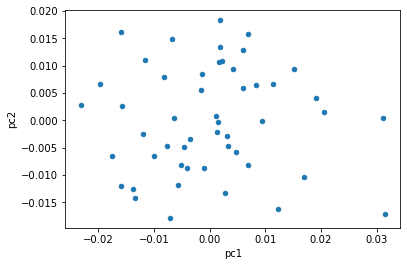

In [13]:
player_bias_mean = player_bias_df.groupby(['player']).mean()
pca = PCA(n_components=2).fit(player_bias_mean)
pca_df = pd.DataFrame(data=pca.transform(player_bias_mean), columns = ['pc1','pc2'])
print(pca.explained_variance_ratio_)
pca_df.plot.scatter(x='pc1',y='pc2')